In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [4]:
def Regula_Falsi(f,a,b,tol, max_iter = 100): # entra funcion implicita, tipo lambda
    if f(a) * f(b) >= 0: #evaluamos si se cumple esat condicion
       raise ValueError('f(a) y f(b) deben tener signos diferentes')
    for i in range(max_iter): # controlar el numero maximo de ciclos
      c = (a* f(b) - b * f(a)) / (f(b)-f(a))
      if abs(f(c)) == 0 or abs(f(c)) < tol: #la raiz
         return c, i+1
      elif f(c)*f(a) < 0:
        a = c
      elif f(c)*f(b) < 0:
        b = c
    raise RuntimeError(f'no se encontro la raiz despues de {max_iter} iteraciones')


In [12]:
tolerancias = [1e-3, 1e-5, 1e-8, 1e-10, 1e-12, 1e-15]
f= lambda x: x**2 - 4
for i in tolerancias:
  raiz, n = Regula_Falsi(f,1,3,i,max_iter=100)
  print(f'La raiz con una tolerancia de {i} es: {raiz} con {n} iteraciones')

La raiz con una tolerancia de 0.001 es: 1.9999736627248546 con 5 iteraciones
La raiz con una tolerancia de 1e-05 es: 2.0000017558306746 con 6 iteraciones
La raiz con una tolerancia de 1e-08 es: 1.9999999994797542 con 9 iteraciones
La raiz con una tolerancia de 1e-10 es: 1.9999999999976878 con 11 iteraciones
La raiz con una tolerancia de 1e-12 es: 2.000000000000154 con 12 iteraciones
La raiz con una tolerancia de 1e-15 es: 2.0 con 15 iteraciones


Es un metodo muy bueno, en este caso vemos que con muy pocas iteraciones logra acercarse muy bien a el valor de la raiz, incluso con la precision mas alta utiliza solo 15 iteraciones y da el valor exacto de la raiz.


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

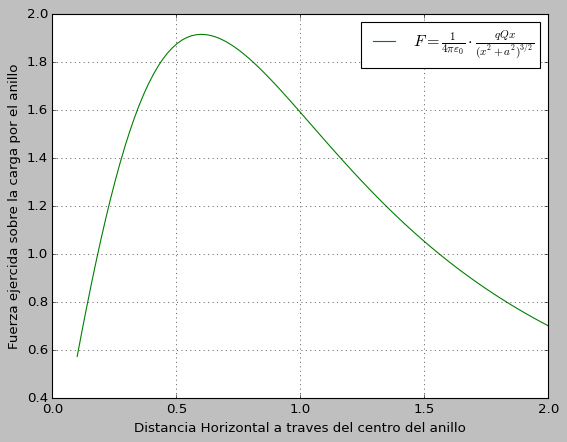

In [7]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

q = 2e-5
Q = 2e-5
e0= 8.8541878188e-12
def Fuerza(a,x):
  c = 1/(4*pi*e0)
  F = c*(q*Q*x)/((x**2 + a**2)**(1.5))
  return F

a= 0.85
x = np.linspace(0.1,2.0,100)
y = Fuerza(a,x)


plt.style.use('classic')
plt.plot(x,y,label =r'$F = \frac{1}{4\pi\varepsilon_0} \cdot \frac{qQx}{(x^2+a^2)^{3/2}}$', color = 'green')
plt.xlabel('Distancia Horizontal a traves del centro del anillo')
plt.ylabel('Fuerza ejercida sobre la carga por el anillo')
plt.legend()
plt.grid()
plt.show()


In [8]:
from scipy.optimize import newton, bisect

def f(x):
    return Fuerza(a, x) - 1.25

def df(x):
    a = 0.85
    num = q * Q * ( (x**2 + a**2)**(1.5) - 3 * x**2 * (x**2 + a**2)**0.5 )
    denom = (x**2 + a**2)**3
    return (1 / (4 * np.pi * e0)) * (num / denom)

raiz_newton = newton(f,x0 = 0.4 ,fprime=df)
print(raiz_newton)
raiz_secante = newton(f, x0=0, x1=1)
print(raiz_secante)

0.23944925515392096
1.297373941688891


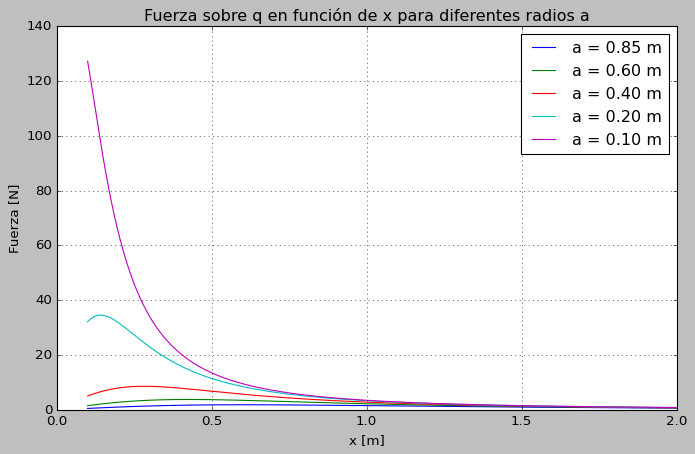

In [15]:
q = 2e-5
Q = 2e-5
e0 = 8.8541878188e-12

def Fuerza(a, x):
    c = 1 / (4 * np.pi * e0)
    F = c * (q * Q * x) / ((x**2 + a**2)**(1.5))
    return F

# Valores de radio a reducir
a_valores = [0.85, 0.6, 0.4, 0.2, 0.1]  # metros
x = np.linspace(0.1, 2.0, 200)        # valores de x

plt.figure(figsize=(10,6))
for a in a_valores:
    F_valores = Fuerza(a, x)
    plt.plot(x, F_valores, label=f'a = {a:.2f} m')

plt.title("Fuerza sobre q en función de x para diferentes radios a")
plt.xlabel("x [m]")
plt.ylabel("Fuerza [N]")
plt.legend()
plt.grid(True)
plt.show()


# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



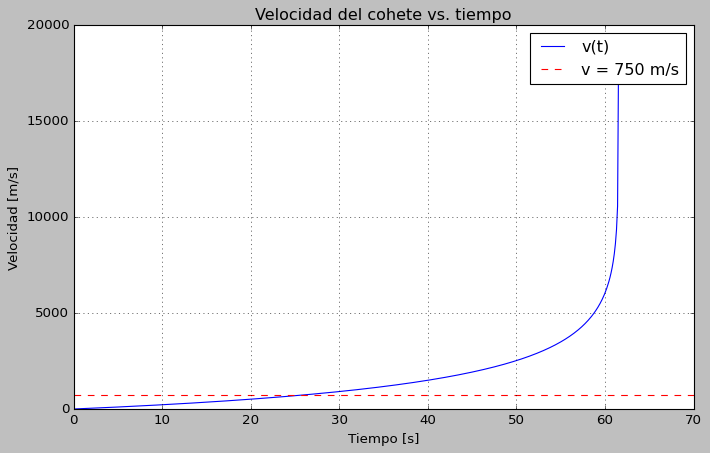

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
m0 = 1.6e5       # kg
u = 1800         # m/s
q = 2600         # kg/s
g = 9.81         # m/s^2

# Definimos la función v(t)
def v(t, u=u):
    return u * np.log(m0 / (m0 - q * t)) - g * t

# Dominio de t (evitamos el valor donde m0 - qt = 0)
t = np.linspace(0.1, m0/q - 1e-3, 500)
v_vals = v(t)

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(t, v_vals, label='v(t)')
plt.axhline(750, color='r', linestyle='--', label='v = 750 m/s')
plt.xlabel('Tiempo [s]')
plt.ylabel('Velocidad [m/s]')
plt.title('Velocidad del cohete vs. tiempo')
plt.grid(True)
plt.legend()
plt.show()


In [11]:
def f(t):
    return v(t) - 750
from scipy.optimize import newton

# Derivada aproximada
def f_prime(t, h=1e-5):
    return (f(t + h) - f(t - h)) / (2 * h)

# Aplicamos Newton-Raphson
t_nr = newton(f, x0=10, fprime=f_prime)
print(f"Newton-Raphson: t ≈ {t_nr:.4f} s")

from scipy.optimize import bisect

t_bis = bisect(f, 1, 50)
print(f"Bisección: t ≈ {t_bis:.4f} s")


t_rf = Regula_Falsi(f, 1, 50, tol=1e-12)
print(f"Regula-Falsi (brentq): t ≈ {t_rf} s")


Newton-Raphson: t ≈ 26.4078 s
Bisección: t ≈ 26.4078 s
Regula-Falsi (brentq): t ≈ (np.float64(26.40784795596706), 22) s


Encontrando tiempos para v = 750 m/s para diferentes valores de u:
  Para u = 1000.00 m/s, el tiempo es t ≈ 42.3524 s
  Para u = 1105.26 m/s, el tiempo es t ≈ 39.5626 s
  Para u = 1210.53 m/s, el tiempo es t ≈ 36.9997 s
  Para u = 1315.79 m/s, el tiempo es t ≈ 34.6625 s
  Para u = 1421.05 m/s, el tiempo es t ≈ 32.5397 s
  Para u = 1526.32 m/s, el tiempo es t ≈ 30.6151 s
  Para u = 1631.58 m/s, el tiempo es t ≈ 28.8703 s
  Para u = 1736.84 m/s, el tiempo es t ≈ 27.2873 s
  Para u = 1842.11 m/s, el tiempo es t ≈ 25.8487 s
  Para u = 1947.37 m/s, el tiempo es t ≈ 24.5387 s
  Para u = 2052.63 m/s, el tiempo es t ≈ 23.3430 s
  Para u = 2157.89 m/s, el tiempo es t ≈ 22.2491 s
  Para u = 2263.16 m/s, el tiempo es t ≈ 21.2456 s
  Para u = 2368.42 m/s, el tiempo es t ≈ 20.3228 s
  Para u = 2473.68 m/s, el tiempo es t ≈ 19.4720 s
  Para u = 2578.95 m/s, el tiempo es t ≈ 18.6858 s
  Para u = 2684.21 m/s, el tiempo es t ≈ 17.9575 s
  Para u = 2789.47 m/s, el tiempo es t ≈ 17.2812 s
  Para u = 2894

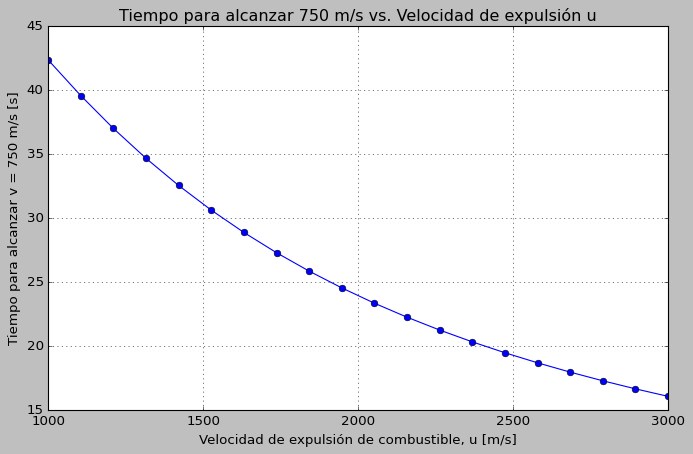


Conclusiones:
Al variar la velocidad de expulsión del combustible (u), observamos que:
- A medida que 'u' aumenta, el tiempo requerido para que el cohete alcance una velocidad de 750 m/s disminuye.
- Esto es esperable, ya que una mayor velocidad de expulsión genera un mayor impulso y, por lo tanto, una mayor aceleración.
- Si 'u' es demasiado bajo, el cohete podría no ser capaz de alcanzar los 750 m/s antes de agotar su combustible (o dentro del intervalo de tiempo).


In [24]:
# Rango de valores para u
u_valores = np.linspace(1000, 3000, 20) # 20 valores de u entre 1000 y 3000 m/s

m0 = 1.6e5       # kg
q = 2600         # kg/s
g = 9.81         # m/s^2
v1 = 750   # m/s

tiemposv1 = []

print("Encontrando tiempos para v = 750 m/s para diferentes valores de u:")

for u1 in u_valores:
    def fparau(t):
        # Evitar logaritmo de valores no positivos o cero en el denominador
        if m0 - q * t <= 0:
            return np.inf # Retorna infinito si el tiempo excede el límite físico
        return u1 * np.log(m0 / (m0 - q * t)) - g * t - v1

    try:
        tiempoencontrado = bisect(fparau, 1, m0/q - 0.1)
        tiemposv1.append(tiempoencontrado)
        print(f"  Para u = {u1:.2f} m/s, el tiempo es t ≈ {tiempoencontrado:.4f} s")
    except ValueError:
        tiemposv1.append(np.nan) # Agrega NaN si no se encuentra la raíz en el intervalo
        print(f"  Para u = {u1:.2f} m/s, la velocidad de 750 m/s no se alcanza en el intervalo buscado.")
    except RuntimeError:
         tiemposv1.append(np.nan)
         print(f"  Para u = {u1:.2f} m/s, la búsqueda de la raíz falló.")

plt.figure(figsize=(10, 6))
plt.plot(u_valores, tiemposv1, 'o-', color='blue')
plt.xlabel('Velocidad de expulsión de combustible, u [m/s]')
plt.ylabel('Tiempo para alcanzar v = 750 m/s [s]')
plt.title('Tiempo para alcanzar 750 m/s vs. Velocidad de expulsión u')
plt.grid(True)
plt.show()

print("\nConclusiones:")
print("Al variar la velocidad de expulsión del combustible (u), observamos que:")
print("- A medida que 'u' aumenta, el tiempo requerido para que el cohete alcance una velocidad de 750 m/s disminuye.")
print("- Esto es esperable, ya que una mayor velocidad de expulsión genera un mayor impulso y, por lo tanto, una mayor aceleración.")
print("- Si 'u' es demasiado bajo, el cohete podría no ser capaz de alcanzar los 750 m/s antes de agotar su combustible (o dentro del intervalo de tiempo).")